In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def plot_line(p1, p2, text = None, ax = plt, **kwargs):
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]
    z = [p1[2], p2[2]]
    ax.plot(x, y, z, **kwargs)
    if text is not None:
        ax.text(x[1], y[1], z[1], text)

def plot_lines(lines, ax = plt, **kwargs):
    for p in lines:
        if len(p) < 2:
            continue
        text = None if len(p) <= 2 else p[2]
        plot_line(p[0], p[1], text = text, ax = ax, **kwargs)

def plot_coordinates(st, length, ax = plt, **kwargs):
    lines = []
    tags = ["x", "y", "z"]
    for i in range(3):
        ed = st.copy()
        ed[i] += length
        lines.append([st, ed, tags[i]])
    plot_lines(lines, ax = ax, **kwargs) 


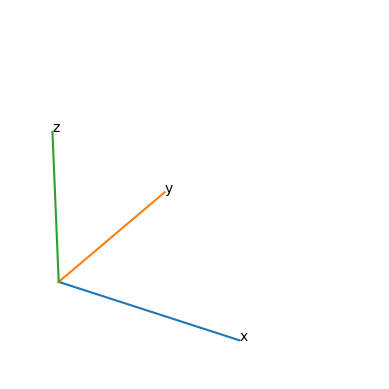

In [ ]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the X, Y, and Z axes
plot_coordinates([0,0,0], 10, ax = ax)

ax.grid(False)
ax.axis("off")


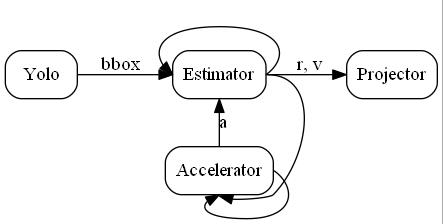

In [121]:
# import module 
from graphviz import Digraph 
from PIL import Image
  
# instantiating object 
dot = Digraph("flow1", comment='Network')
dot.attr(rankdir = "LR")
dot.attr("node", shape = "rect", style ="rounded")

c1 = Digraph("cluster1")
c1.attr(rankdir = "LR", color = "white")
c1.attr("node", shape = "rect", style ="rounded")

# Adding nodes
dot.node('yolo', 'Yolo')
c1.node('est', 'Estimator')
c1.node('acc', 'Accelerator')
dot.node("proj", 'Projector') 
  
# Adding edges
dot.edge("yolo", "est", label="bbox")
dot.edge('est', 'proj', label="r, v") 
c1.edge('acc', 'est', label = "a", constraint = "false") 
c1.edge("acc:e", "acc:s", constraint = "false")
c1.edge("est:e", "est:w", constraint = "false")
c1.edge("est:e", "acc:s", constraint = "false")

dot.subgraph(c1)
# check source
# print(dot.source)

# saving source code 
file, ext = "flow1", "jpg"
dot.format = ext
dot.render(file, view = False, cleanup = True)

Image.open(file + "." + ext)

In [122]:
import math

t = 5 * math.pi / 180
h0 = np.array([math.cos(t), 0, math.sin(t)])
h1 = np.array([0, 1, 0])
h2 = np.cross(h0, h1)
print(h2, h2.transpose() @ h2)

h2[0:2] = (1, 3)
print(h2)

[-0.08715574  0.          0.9961947 ] 1.0
[1.        3.        0.9961947]
